# Projet 2 - Youtube --Fred--

### Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import des données

##### Data

In [2]:
data_fr = pd.read_csv("data/modif_FRvideos.csv")

/home/fred/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_fr.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id               float64
publish_time               object
tags                       object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
category                   object
engagement                float64
duree                     float64
dtype: object

In [4]:
print(data_fr.shape)
data_fr.head(2)

(40854, 19)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,engagement,duree
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24.0,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702.0,29282.0,1108.0,3817.0,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Entertainment,0.077777,NaN
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24.0,2017-11-12T15:00:02.000Z,[none],432721.0,14053.0,576.0,1161.0,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Entertainment,0.029909,3541.0


## Graphs par catégories

#### Nouveau DataFrame allégé

In [5]:
df = data_fr[["title", "category", "duree", "engagement", "views", "likes", "dislikes", "comment_count"]]

In [6]:
df.tail(2)

,title,category,duree,engagement,views,likes,dislikes,comment_count
40852,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",Film & Animation,2257.0,0.003712,78117.0,244.0,74.0,46.0
40853,Mandoumbé ak Koor Gui 2018 Episode 28,Entertainment,454.0,0.023045,46604.0,947.0,37.0,127.0


### Reduction du jeu de donnéés

##### 200 entrées

In [7]:
#df = df.iloc[0:200, :]

In [8]:
df.shape

(40854, 8)

### Views / Catégories

In [9]:
df.category.unique()

array(['Entertainment', 'Comedy', 'Gaming', 'Sports', 'People & Blogs',
       'Education', 'Howto & Style', 'Science & Technology',
       'Autos & Vehicles', 'News & Politics', 'Film & Animation', 'Music',
       'Shows', 'Travel & Events', 'Pets & Animals', nan, 'Movies',
       'Trailers'], dtype=object)

In [10]:
df.shape

(40854, 8)

In [11]:
df = df[~df["category"].isnull()]

In [12]:
df.shape

(40593, 8)

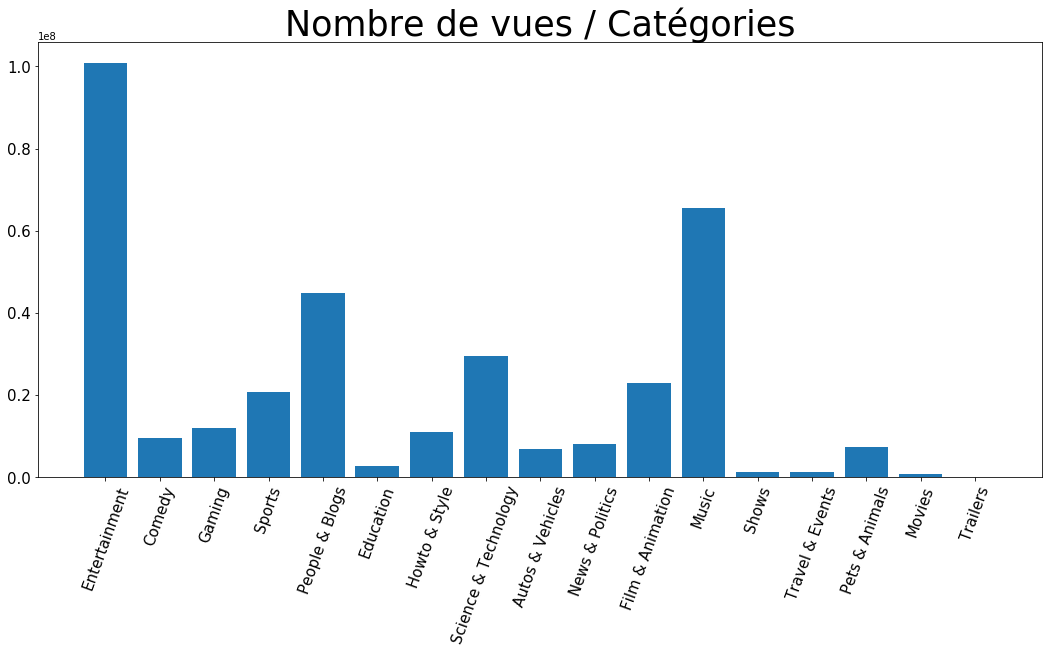

In [14]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["views"])
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de vues / Catégories", size=35)

plt.show()

### Likes / Catégories

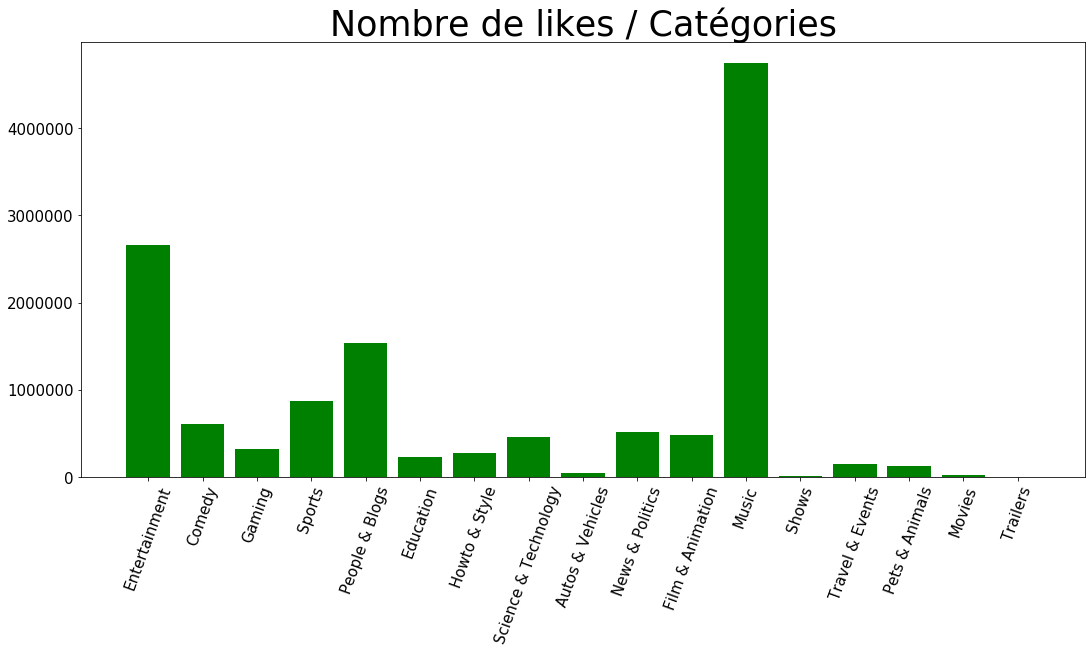

In [15]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["likes"], color="g")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de likes / Catégories", size=35)

plt.show()

### Dislikes / Catégories

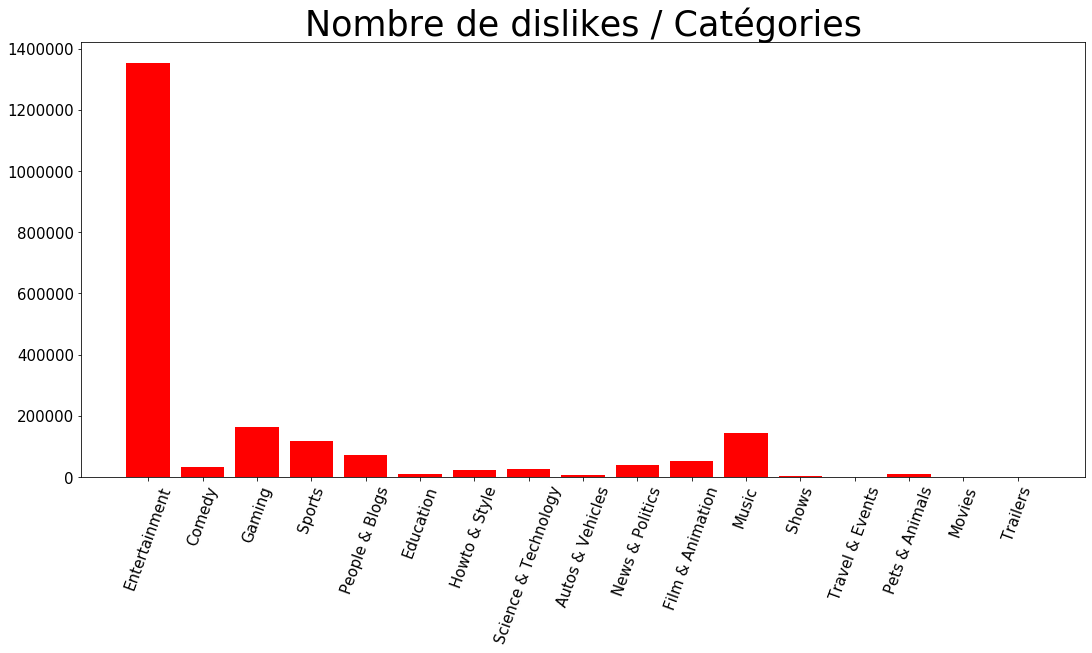

In [16]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["dislikes"], color="r")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de dislikes / Catégories", size=35)

plt.show()

### Comments / Catégories

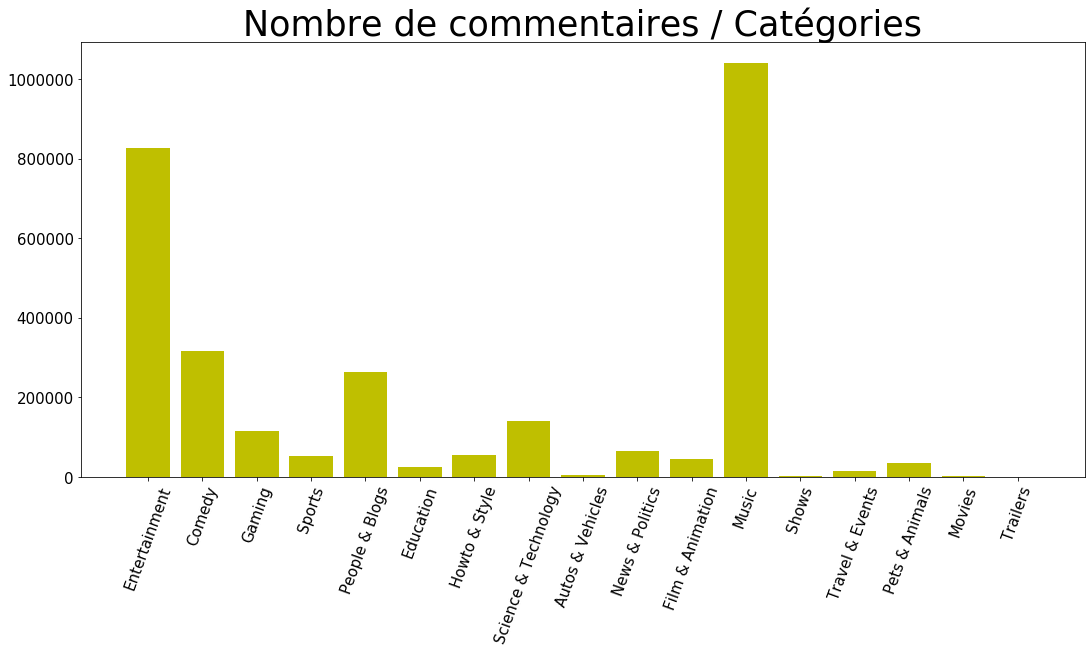

In [17]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["comment_count"], color="y")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de commentaires / Catégories", size=35)

plt.show()

### Groupé

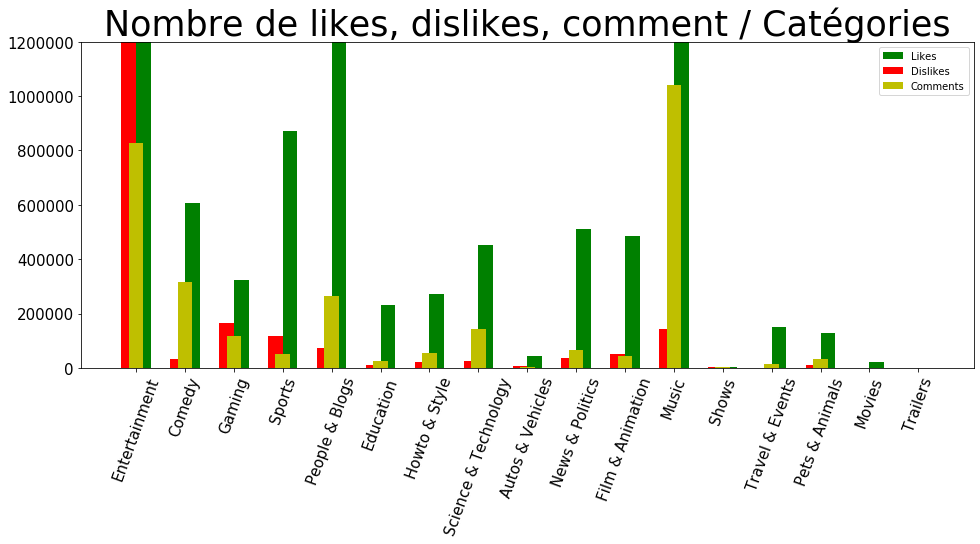

In [18]:
plt.figure(figsize=(16,6))

#plt.bar(df["category"], df["views"])
plt.bar(df["category"], df["likes"],label="Likes", width=0.3, align="edge", color="g")
plt.bar(df["category"], df["dislikes"],label="Dislikes", width=-0.3, align="edge", color="r")
plt.bar(df["category"], df["comment_count"],label="Comments", width=0.3, align="center", color="y")


plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.ylim(0,1200000)

plt.title("Nombre de likes, dislikes, comment / Catégories", size=35)
plt.legend(loc="best", bbox_to_anchor=(1,1))

plt.show()

## Travail sur les mots-clés

### DataFrame allégé

In [45]:
df = data_fr.copy()
#df = df[0:200]
df.shape

(40854, 19)

In [46]:
df = df[~df["tags"].isnull()]

#### Création d'un dictionnaire de mots-cles

In [47]:
tags = df["tags"].values

In [48]:
def supprime_accent(ligne):
        """ supprime les accents du texte source """
        accent = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â']
        sans_accent = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a']
        i = 0
        while i < len(accent):
            ligne = ligne.replace(accent[i], sans_accent[i])
            i += 1
        return ligne

In [49]:
tags[0:1]

array(['Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|"merde'],
      dtype=object)

In [50]:
liste_tags = []
for y in tags:
    y = y.lower()
    result = supprime_accent(y)
    result = result.split('"|"')
    liste_tags.append(result)

In [51]:
dico_tags = {}
for x in liste_tags:
    for x in x:
        if x in dico_tags.keys():
            dico_tags[x] += 1
        else:
            dico_tags[x] = 1

In [52]:
len(dico_tags.keys())

125790

#### Classement du dico

In [53]:
dico_tags_sorted = sorted(dico_tags.items(),key=lambda c:c[1], reverse=True)
dico_tags_sorted

[('[none]', 5304),
 ('humour', 2279),
 ('football', 1433),
 ('2018', 1433),
 ('france', 1374),
 ('video', 1104),
 ('rap', 969),
 ('drole', 888),
 ('tv', 819),
 ('francais', 812),
 ('serie', 761),
 ('paris', 736),
 ('live', 728),
 ('divertissement', 681),
 ('freestyle', 672),
 ('musique', 669),
 ('foot', 650),
 ('2017', 626),
 ('interview', 602),
 ('funny', 589),
 ('senegal', 559),
 ('sketch', 555),
 ('film', 553),
 ('music', 549),
 ('psg', 531),
 ('comedy', 519),
 ('sport', 514),
 ('fr', 511),
 ('maroc', 502),
 ('amour', 500),
 ('johnny hallyday', 499),
 ('top 10', 491),
 ('television', 482),
 ('vlog', 468),
 ('politique', 465),
 ('tuto', 453),
 ('youtube', 450),
 ('news', 449),
 ('replay', 446),
 ('comedie', 444),
 ('highlights', 434),
 ('neymar', 430),
 ('rire', 427),
 ('clip', 420),
 ('theatre', 420),
 ('cinema', 417),
 ('top', 417),
 ('fun', 416),
 ('prank', 415),
 ('zap', 411),
 ('tpmp', 405),
 ('booba', 404),
 ('diy', 387),
 ('macron', 387),
 ('ronaldo', 368),
 ('de', 363),
 ('cl

##### Top 50 des tags

In [56]:
top_tags = []
for x, y in dico_tags_sorted[1:51]:
    top_tags.append(x)
top_tags

['humour',
 'football',
 '2018',
 'france',
 'video',
 'rap',
 'drole',
 'tv',
 'francais',
 'serie',
 'paris',
 'live',
 'divertissement',
 'freestyle',
 'musique',
 'foot',
 '2017',
 'interview',
 'funny',
 'senegal',
 'sketch',
 'film',
 'music',
 'psg',
 'comedy',
 'sport',
 'fr',
 'maroc',
 'amour',
 'johnny hallyday',
 'top 10',
 'television',
 'vlog',
 'politique',
 'tuto',
 'youtube',
 'news',
 'replay',
 'comedie',
 'highlights',
 'neymar',
 'rire',
 'clip',
 'theatre',
 'cinema',
 'top',
 'fun',
 'prank',
 'zap',
 'tpmp']

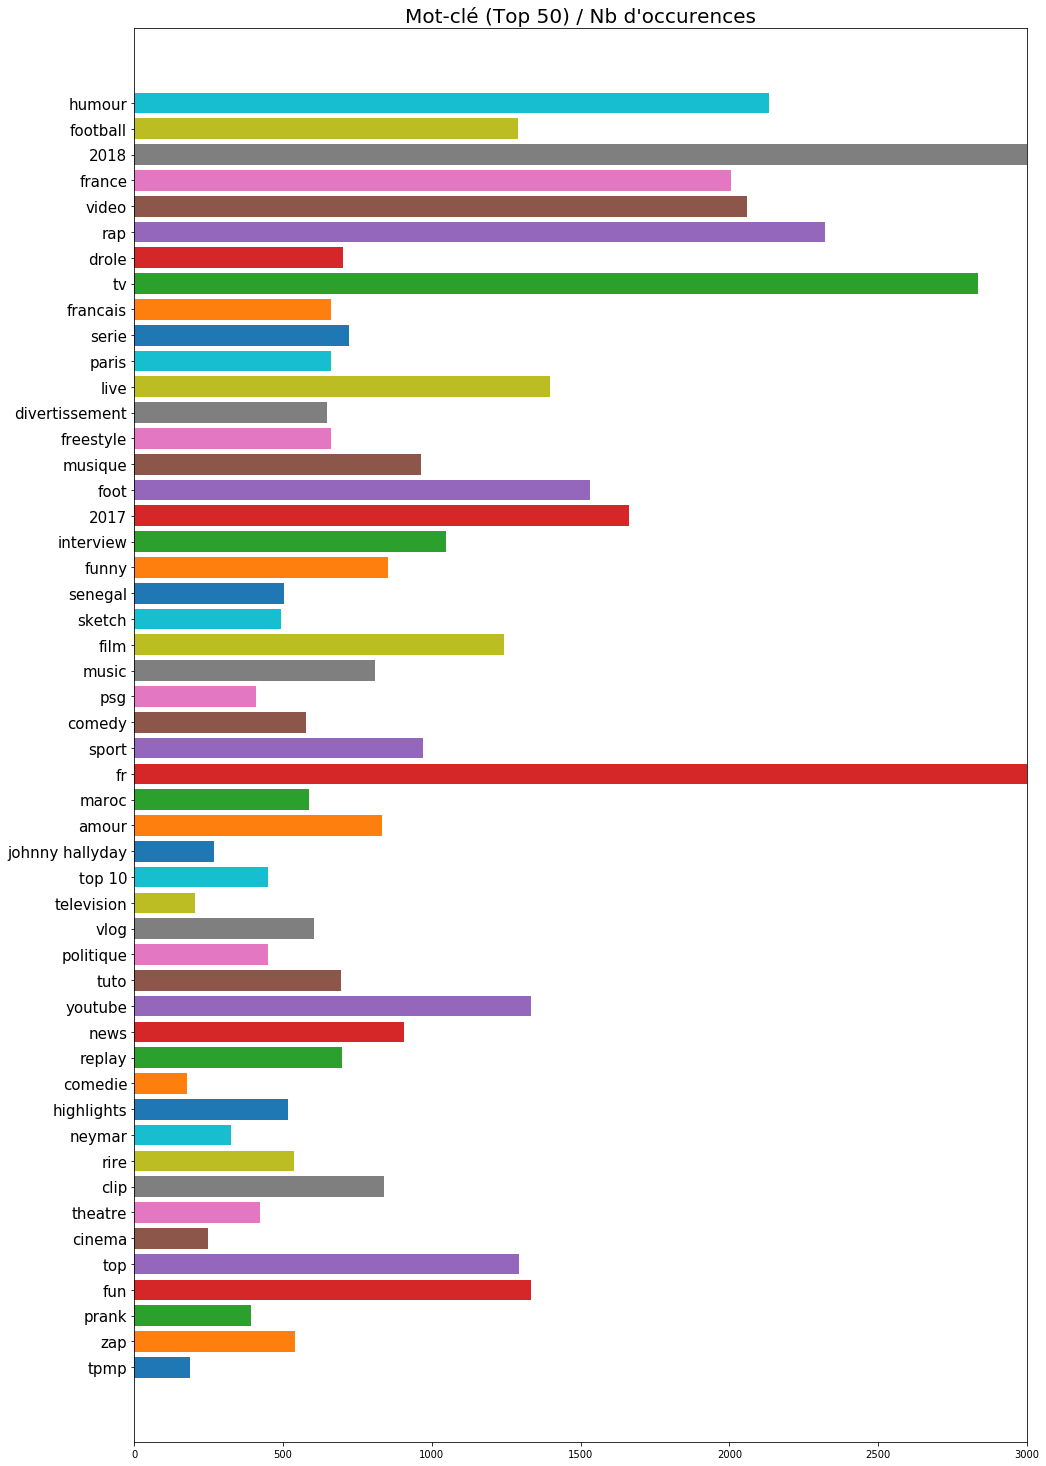

In [73]:
plt.figure(figsize=(16,26))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df[df["tags"].str.contains(top_tags[x])].count())

plt.yticks(size=15)
plt.xlim(0,3000)
plt.title("Mot-clé (Top 50) / Nb d'occurences", fontsize=20)
plt.show()

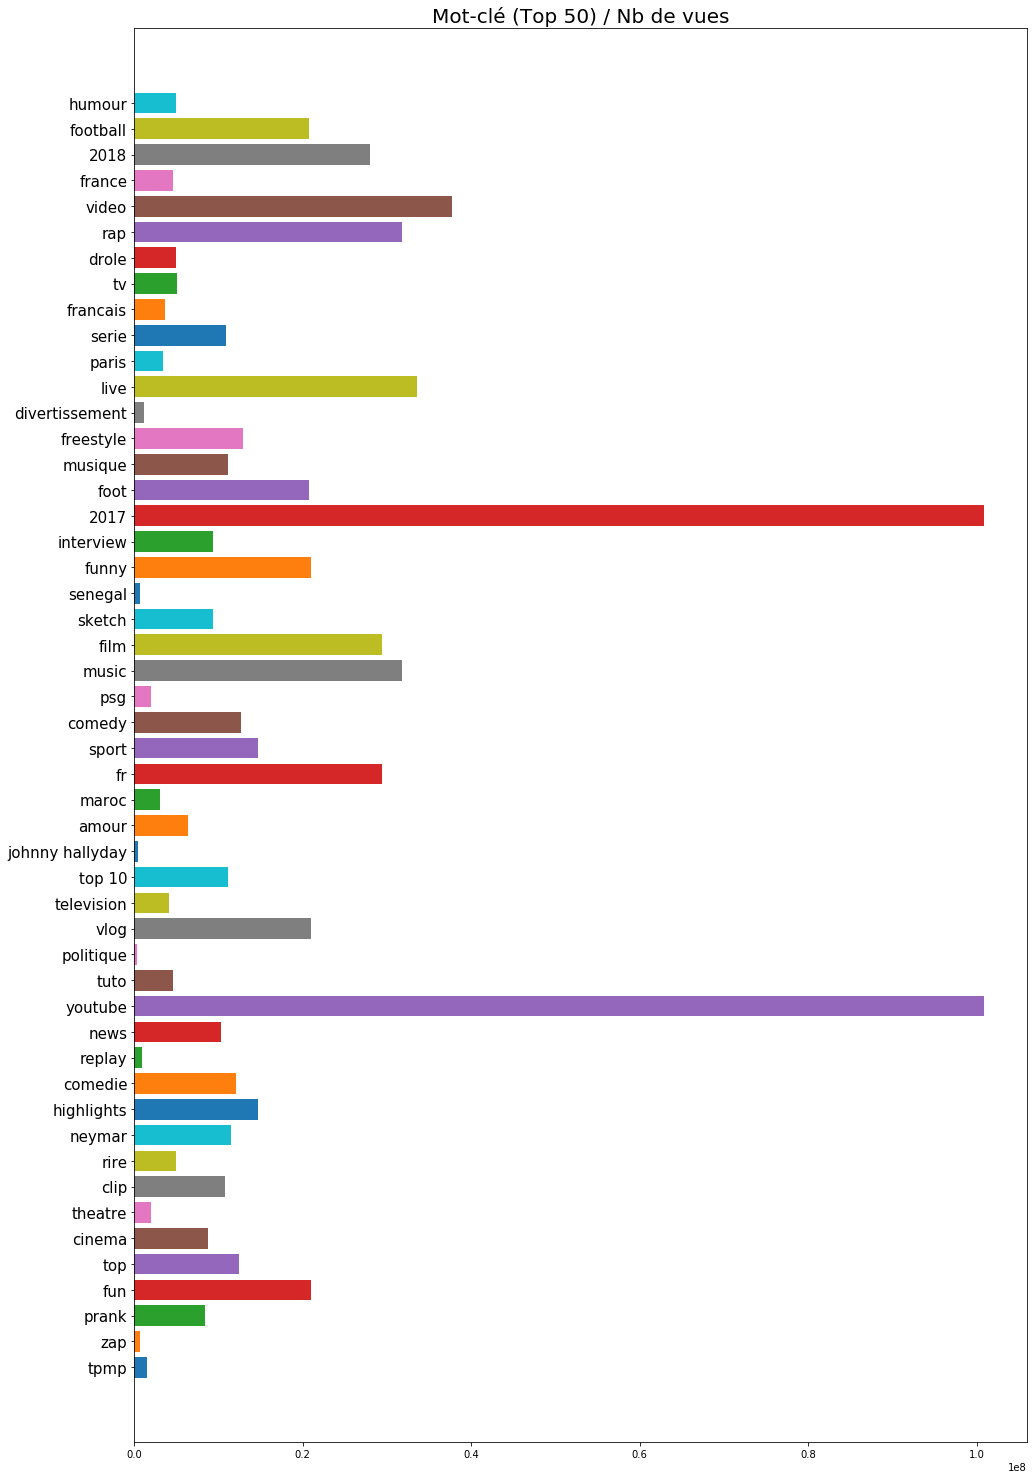

In [75]:
plt.figure(figsize=(16,26))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df["views"][df["tags"].str.contains(top_tags[x])])

plt.yticks(size=15)
plt.title("Mot-clé (Top 50) / Nb de vues", fontsize=20)
plt.show()

### Taux d'engagement
nb likes + nb commentaires / nb vues

In [58]:
df_engage = data_fr.copy()

In [61]:
df_engage = df_engage[~df_engage["category"].isnull()]

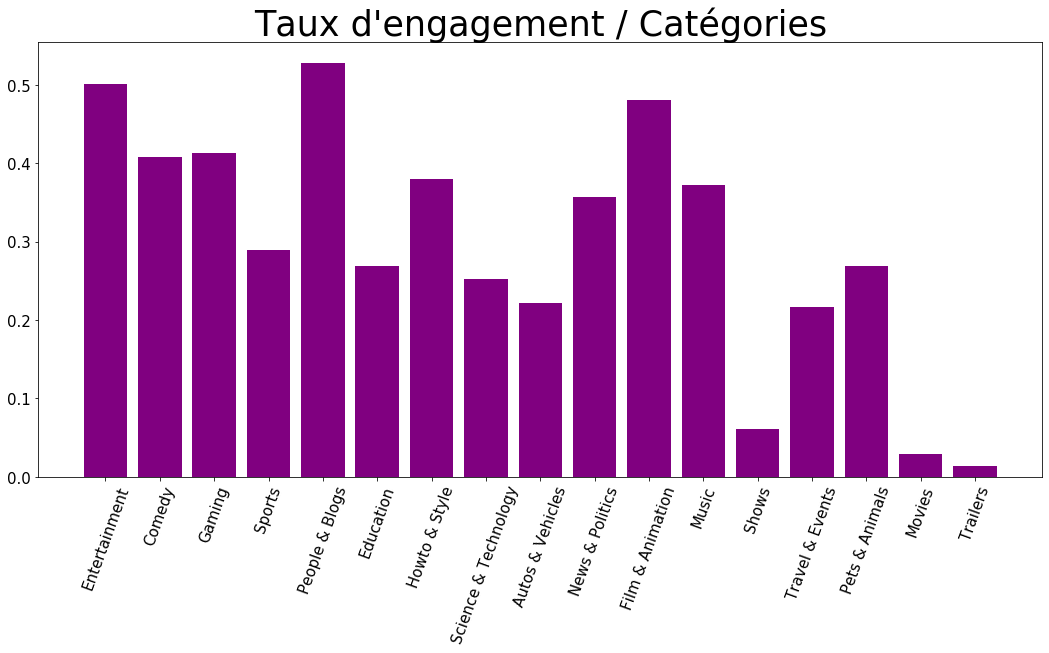

In [62]:
plt.figure(figsize=(18,8))

plt.bar(df_engage["category"], df_engage["engagement"], color="purple")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Taux d'engagement / Catégories", size=35)

plt.show()

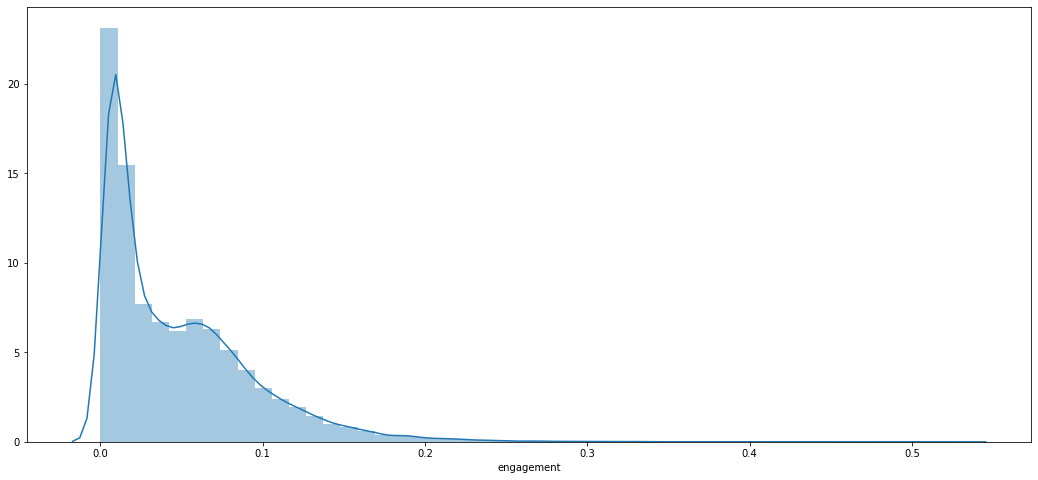

In [63]:
plt.figure(figsize=(18,8))
sns.distplot(df_engage["engagement"])
plt.show()

<Figure size 1296x576 with 0 Axes>

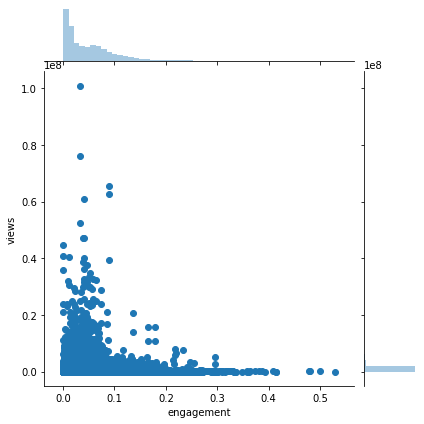

In [64]:
plt.figure(figsize=(18,8))
sns.jointplot(data=df_engage, x="engagement", y="views")
plt.show()

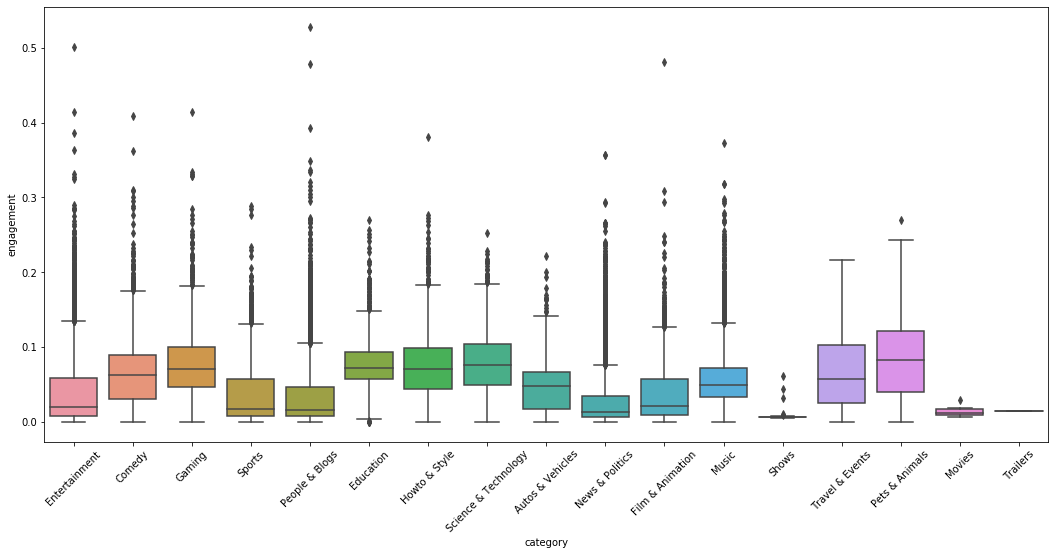

In [65]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_engage, x="category", y="engagement")
plt.xticks(rotation=45)
plt.show()

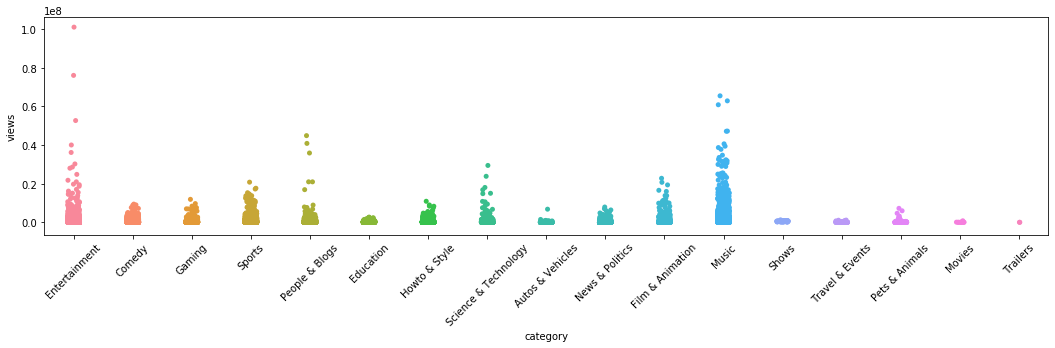

In [66]:
plt.figure(figsize=(18,4))
sns.stripplot(data=df_engage, x="category", y="views")
plt.xticks(rotation=45)
plt.show()

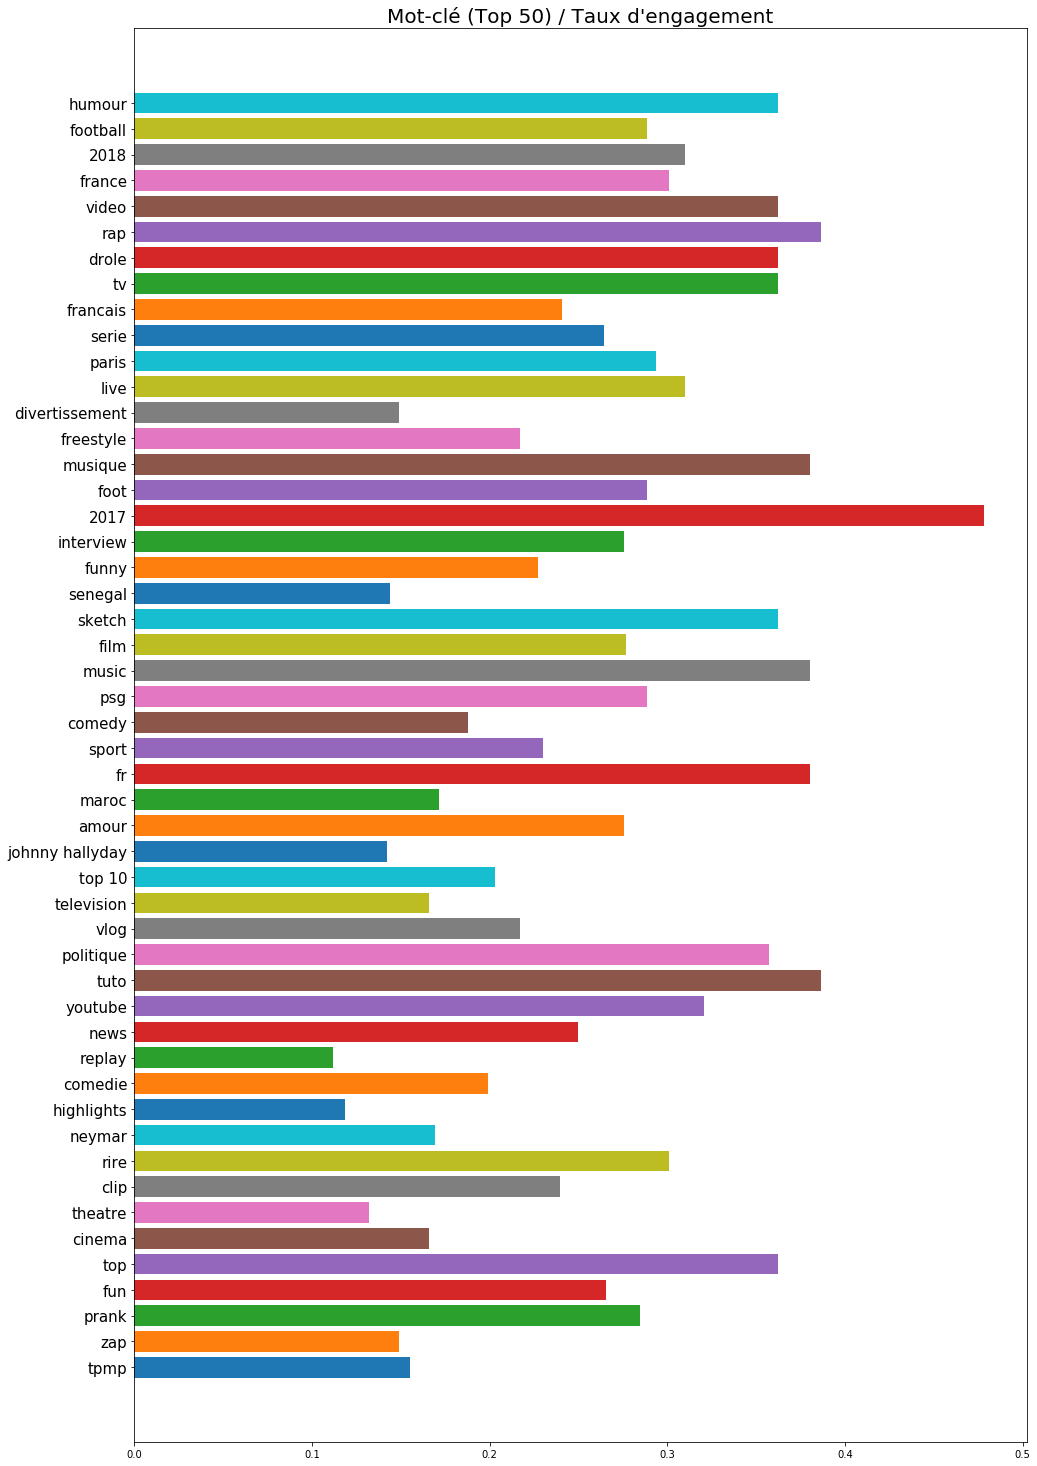

In [67]:
plt.figure(figsize=(16,26))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df_engage["engagement"][df_engage["tags"].str.contains(top_tags[x])])

plt.yticks(size=15)
plt.title("Mot-clé (Top 50) / Taux d'engagement", fontsize=20)
plt.show()

### Graphs par durée

### Brouillon